Machine Learning Project

Loading the libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importation of the dataset and first visualisation

In [15]:
data = pd.read_csv("Dataset_Projet.csv", sep=";")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Preprocessing the data

In [16]:
#Lets check for missing values
print("Missing values per column :")
print(data.isnull().sum(), "\n")

# Lets check for empty values
print("Empty values per column :")
print(data.applymap(lambda x: str(x).strip() == '').sum(), "\n")

#Encoding categorical values in numerical values
encoder = LabelEncoder()
qualitative_cols = data.select_dtypes(include=["object", "category"]).columns
for col in qualitative_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))

print(data.head())

Missing values per column :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

Empty values per column :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


/tmp/ipython-input-1668868973.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(data.applymap(lambda x: str(x).strip() == '').sum(), "\n")


Exploration des données

First view of the dataset :


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520



Statistics on the dataset :


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


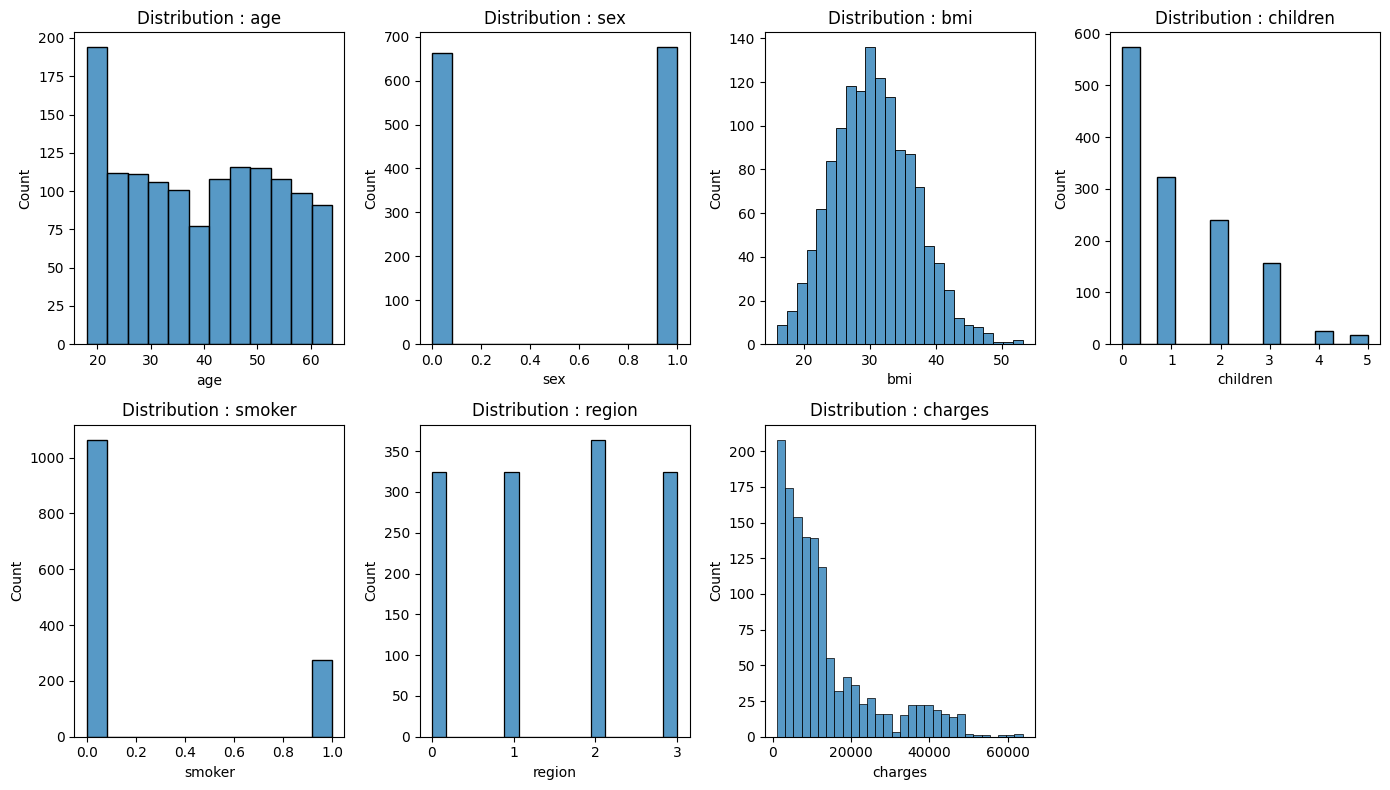

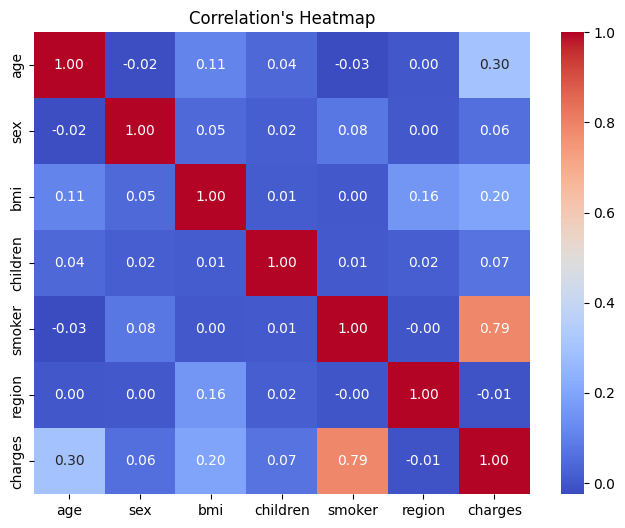

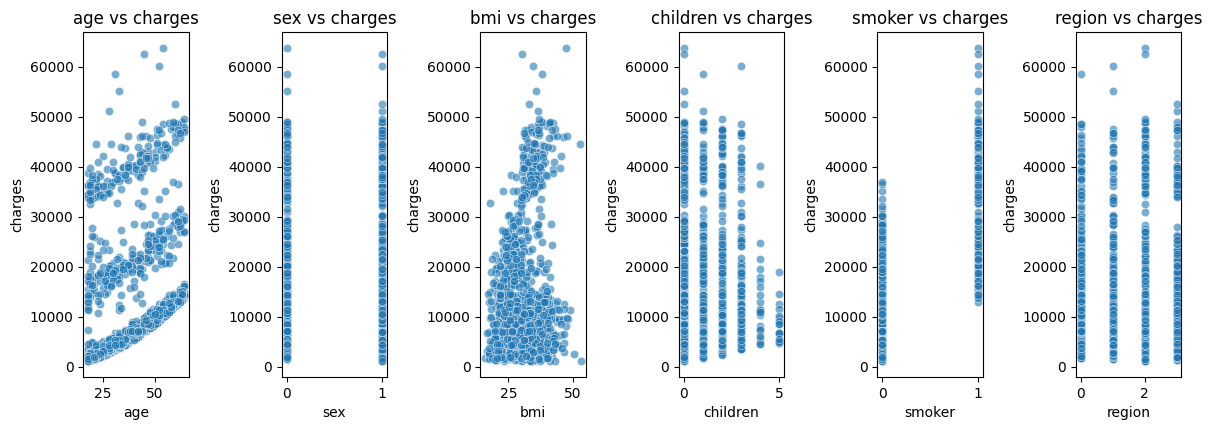

In [17]:
print("First view of the dataset :")
display(data.head())

print("\nStatistics on the dataset :")
display(data.describe())

# List of the differebt columns
num_cols = data.columns

# Lets check the spread of the differents variables
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    sns.histplot(data[col])
    plt.title(f"Distribution : {col}")
plt.tight_layout()
plt.show()

# Correlation's heatmap
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation's Heatmap")
plt.show()

# Scatterplots with the "charges" variable
target = "charges"

plt.figure(figsize=(14, 8))
plot_index = 1
for col in num_cols:
    if col != target:
        plt.subplot(2, (len(num_cols)), plot_index)
        sns.scatterplot(x=data[col], y=data[target], alpha=0.6)
        plt.title(f"{col} vs {target}")
        plot_index += 1

plt.tight_layout()
plt.show()

Splitting the dataset

In [18]:
# Targeting the variable useful for the model
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Visualisation of the training set
print("\nFirst view of the training set :")
print(X_train.head())


First view of the training set :
      age  sex    bmi  children  smoker  region
560    46    0  19.95         2       0       1
1285   47    0  24.32         0       0       0
1142   52    0  24.86         0       0       2
969    39    0  34.32         5       0       2
486    54    0  21.47         3       0       1


Scaling the dataset

In [19]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


Preparing the Linear Regression Model

In [20]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Prediction of the different prices

In [21]:
y_pred = model.predict(X_test_scaled)

Visualisation of the different metrics of the model


Regression model's evaluation
MAE  (Mean Absolute Error)      : 4186.509
RMSE (Root Mean Squared Error)  : 33635210.431
R²   (Coefficient de détermination) : 0.783


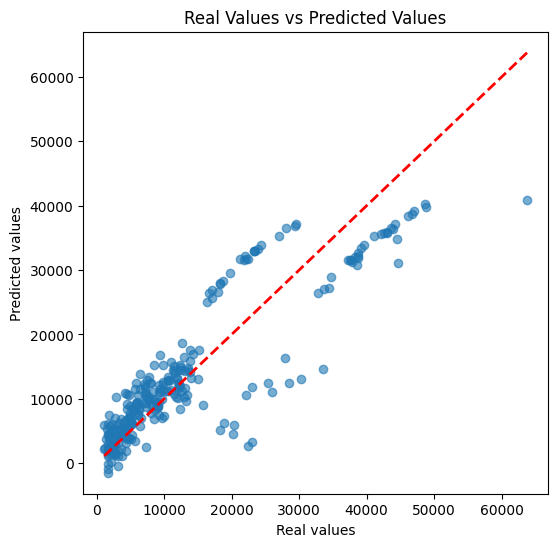

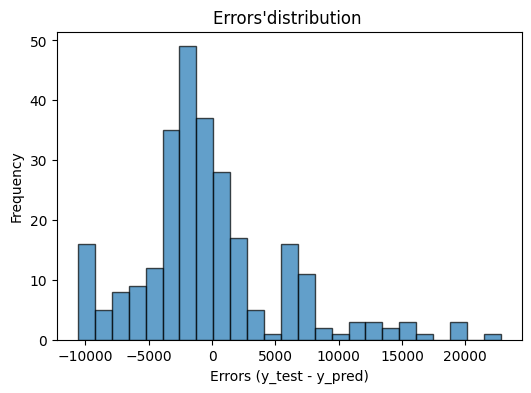

In [22]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, )
r2 = r2_score(y_test, y_pred)

print("\nRegression model's evaluation")
print(f"MAE  (Mean Absolute Error)      : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")

# Visualisation of the predicted values vs the real values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Real Values vs Predicted Values")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Visualisation of the errors
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=25, edgecolor="k", alpha=0.7)
plt.title("Errors'distribution ")
plt.xlabel("Errors (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()